# Performance analysis

Let us study the performance of the new version of the code, considering fidelity, loss and runtime. In this study we choose the default configuration `CFG`, observing the effect of modifying the system size and the use of an extra ancilla.

In [4]:
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
results = {}
iters = 10
sizes = [2, 3, 4]
path = "./cluster_data/pennylane_generator/"

for size in sizes:
    for ancilla in [False, True]:
        for i in range(iters):
            name = f'qgan_size{size}_ancilla{ancilla}_iter{i}.pkl'
            file_path = os.path.join(path, name)
            try:
                with open(file_path, 'rb') as f:
                    loaded_data = pickle.load(f)
                # Store results in a nested dictionary structure
                results.setdefault(size, {}).setdefault(ancilla, {})[i] = loaded_data
            except:
                print(f'No file {name}')
            

CPU device selected.
No file qgan_size4_ancillaFalse_iter4.pkl
No file qgan_size4_ancillaFalse_iter5.pkl
No file qgan_size4_ancillaFalse_iter6.pkl
No file qgan_size4_ancillaFalse_iter7.pkl
No file qgan_size4_ancillaFalse_iter8.pkl
No file qgan_size4_ancillaFalse_iter9.pkl
No file qgan_size4_ancillaTrue_iter0.pkl
No file qgan_size4_ancillaTrue_iter1.pkl
No file qgan_size4_ancillaTrue_iter2.pkl
No file qgan_size4_ancillaTrue_iter3.pkl
No file qgan_size4_ancillaTrue_iter4.pkl
No file qgan_size4_ancillaTrue_iter5.pkl
No file qgan_size4_ancillaTrue_iter6.pkl
No file qgan_size4_ancillaTrue_iter7.pkl
No file qgan_size4_ancillaTrue_iter8.pkl
No file qgan_size4_ancillaTrue_iter9.pkl


c:\Users\f52ga\miniforge3\envs\qgan\Lib\site-packages\pennylane\__init__.py:196: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.0 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


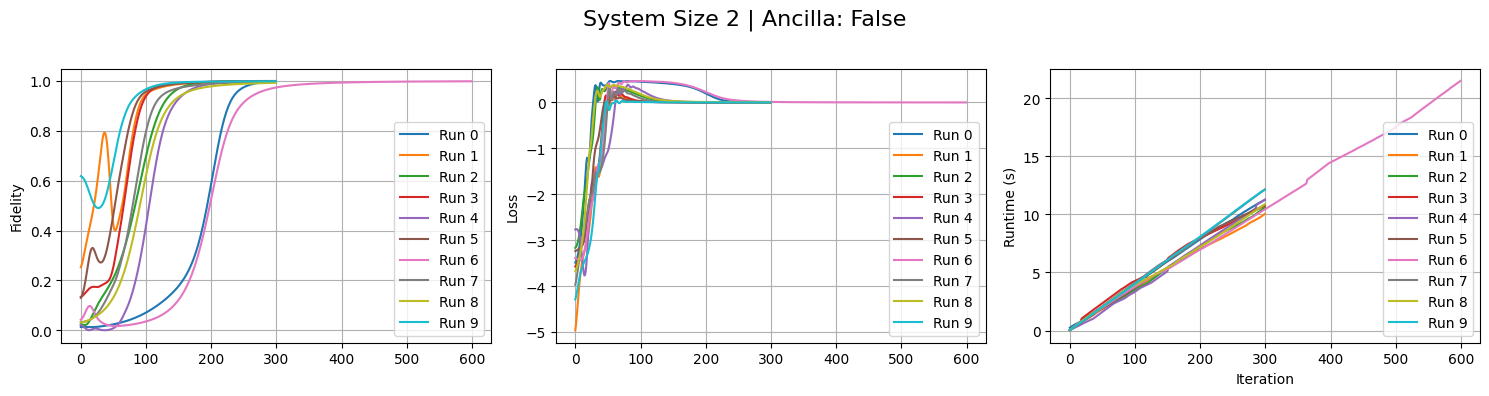

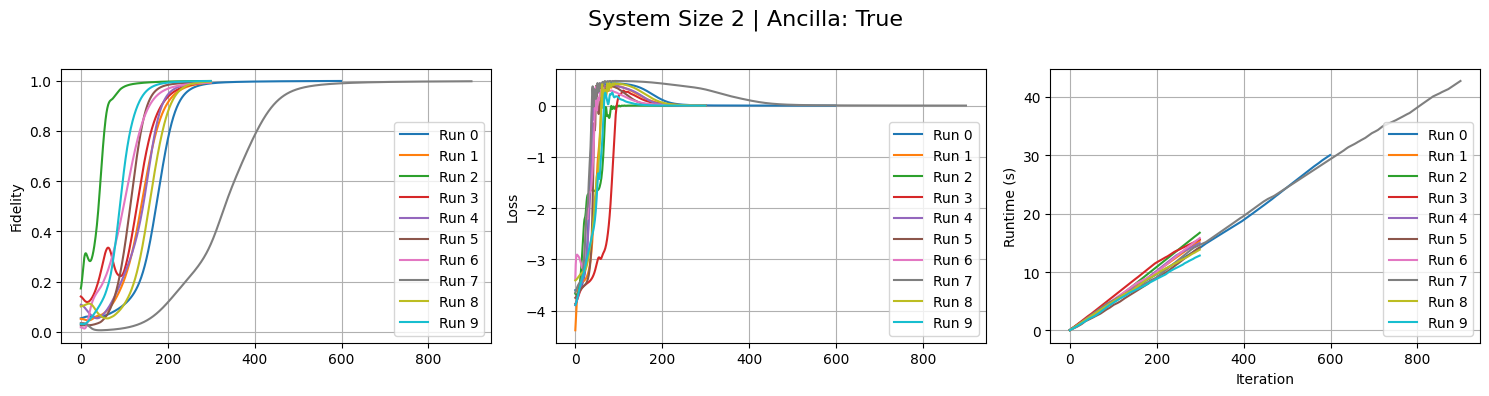

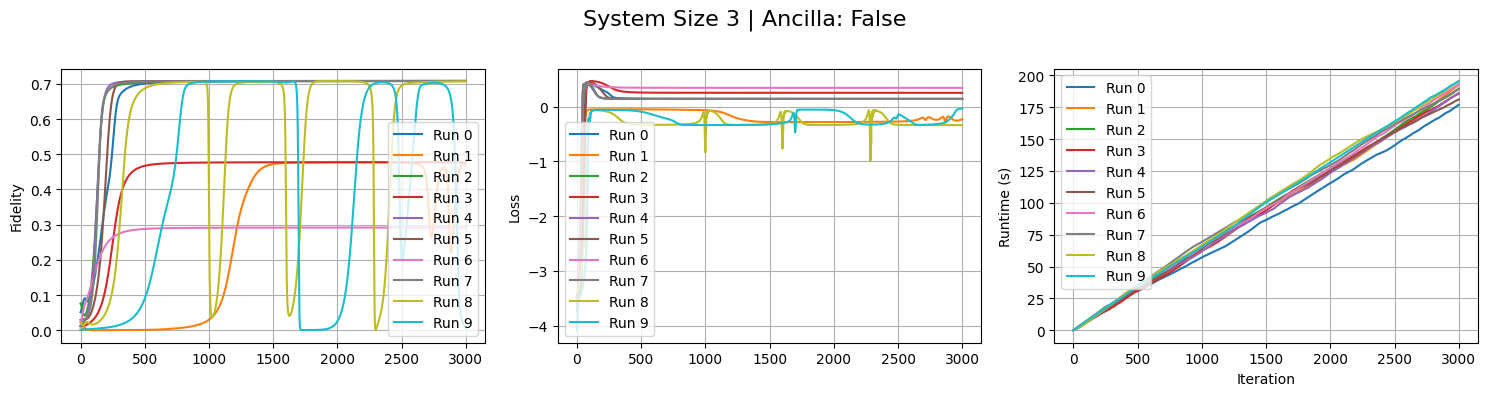

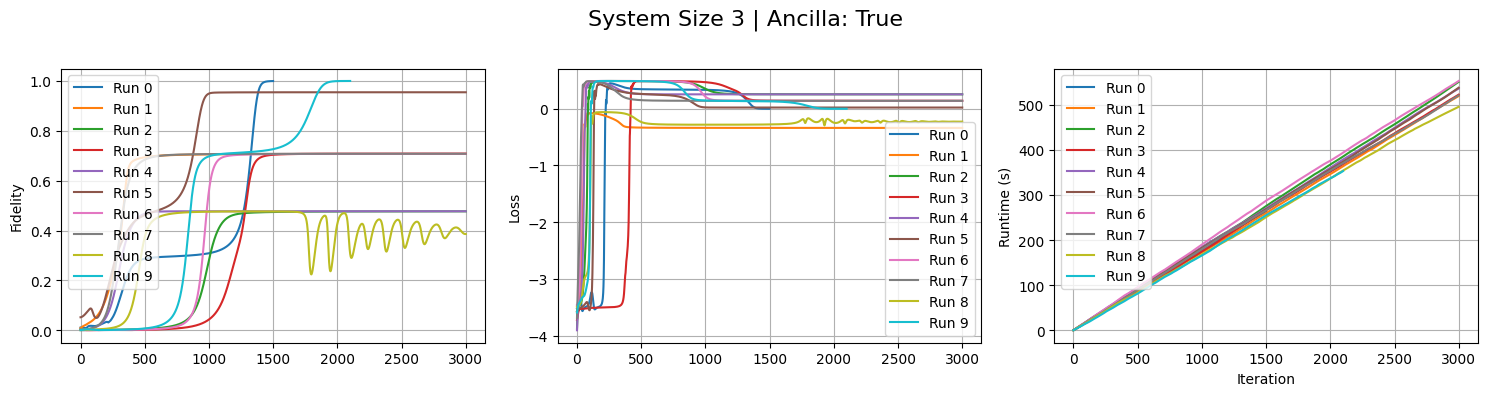

No files for size = 4 and ancilla = False


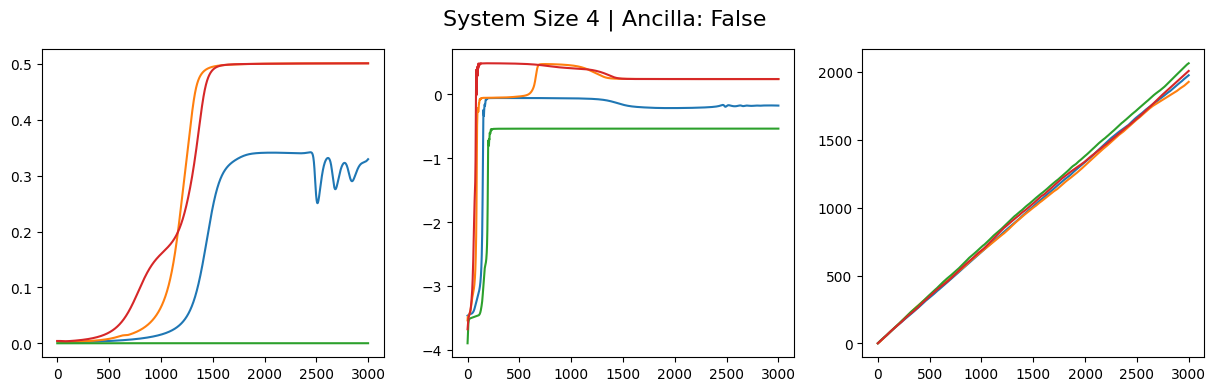

In [6]:
for size in results:
    for ancilla in results[size]:
        fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)
        fig.suptitle(f"System Size {size} | Ancilla: {ancilla}", fontsize=16)
        try:
            for i in range(iters):
                run = results[size][ancilla][i]
                axs[0].plot(run.fidelities, label=f'Run {i}')
                axs[1].plot(run.losses, label=f'Run {i}')
                axs[2].plot(np.cumsum(run.runtimes), label=f'Run {i}')

            axs[0].set_ylabel('Fidelity')
            axs[1].set_ylabel('Loss')
            axs[2].set_ylabel('Runtime (s)')
            axs[2].set_xlabel('Iteration')

            for ax in axs:
                ax.grid(True)
                ax.legend()

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.show()
        except:
            print(f'No files for size = {size} and ancilla = {ancilla}')
